## Vectorized 2D Random Walk
Sasha Bakker

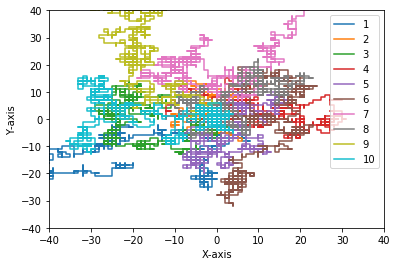

In [15]:
# Import packages
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

# Initialize variables

N = 1000 # step quantity
R = 10 # random walks
b = 40 # boundary value
boo = True # choose whether to plot

# Initialize arrays
arr = np.arange(0,4) # direction indices
brr = np.arange(0,3) # reflection direction indices
xvals,yvals = np.zeros(R),np.zeros(R)

# Initialize lists
origin = [0,0] # initial position
vec = [[1,0],[0,1],[-1,0],[0,-1]] # directions
px = [[0,1],[-1,0],[0,-1]] # positive-x bound
py = [[1,0],[-1,0],[0,-1]] # positive-y bound
nx = [[1,0],[0,1],[0,-1]] # negative-x bound
ny = [[1,0],[0,1],[-1,0]] # negative-y bound
p4 = [1/4,1/4,1/4,1/4] # probabilities of 4-var
p3 = [1/3,1/3,1/3] # probabilities of 3-var

def rwalk(origin, i):
    pos = [origin] # create list

    # This loop executes the random walk with bounds
    # and saves positions in a list
    for n in range(N+1):

        # current position
        x,y = pos[n][0],pos[n][1]

        # check if at bounds, and execute walk accordingly
        if (x or y) != (b or -b): # Not at bounds
            r = rand.choice(arr, p=p4)
            xpos,ypos = x+vec[r][0],y+vec[r][1]
        else:
            if abs(x) != abs(y): # At one of the bounds
                r = rand.choice(brr, p=p3)
                if abs(x) == b:
                    if x == b:
                        xpos,ypos = x+px[r][0],y+px[r][1]
                    else:
                        xpos,ypos = x+nx[r][0],y+nx[r][1]
                elif abs(y) == b:
                    if y == b:
                        xpos,ypos = x+py[r][0],y+py[r][1]
                    else:
                        xpos,ypos = x+ny[r][0],y+ny[r][1]

            # Can add another condition for being at 2 bounds
            # But there are only 4 options out of b**2 positions

        pos.append([xpos,ypos]) # append new position

    if boo == True:
        zip(*pos) # prepare list for plotting
        plt.plot(*zip(*pos),label=i+1) # plot list
    return x,y

# This loop executes rwalk() for R iterations
for i in range(R):
    xvals[i],yvals[i] = rwalk(origin,i)

# Plot the random walks
if boo == True:
    plt.legend() # apply legend to plot
    plt.xlim(-b,b) # set x-boundary
    plt.ylim(-b,b) # set y-boundary
    plt.xlabel("X-axis") # x-label
    plt.ylabel("Y-axis") # y-label
    plt.show() # show plot


Random walk with 1000 steps, 10 walks, and 40 as the boundary value. The directions are equi-probable and each walk has a unique path.

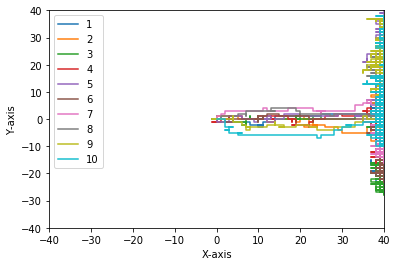

In [16]:
# Initilize lists
p4 = [5/8,1/8,1/8,1/8] # probabilities of 4-var

# This loop executes rwalk() for R iterations
for i in range(R):
    xvals[i],yvals[i] = rwalk(origin,i)

# Plot the random walks
if boo == True:
    plt.legend() # apply legend to plot
    plt.xlim(-b,b) # set x-boundary
    plt.ylim(-b,b) # set y-boundary
    plt.xlabel("X-axis") # x-label
    plt.ylabel("Y-axis") # y-label
    plt.show() # show plot


Random walk with 1000 steps, 10 walks, and 40 as the boundary value. The positive x-direction has high probability, and each walk generally moves in this direction

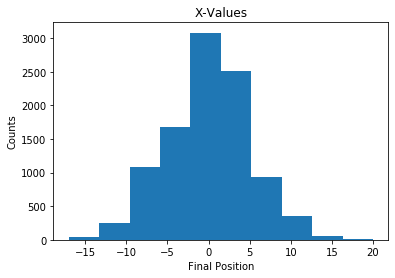

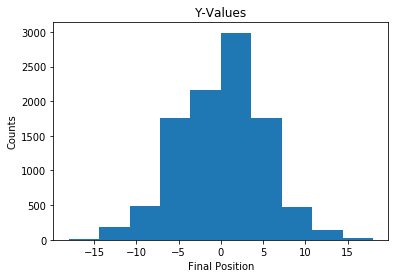

In [18]:
# Initialize variables
N = 50 # step quantity
R = 10**4 # random walks
boo = False # choose whether to plot

# Initialize arrays
xvals,yvals = np.zeros(R),np.zeros(R)

# Initialize lists
p4 = [1/4,1/4,1/4,1/4] # probabilities of 4-var

# This loop executes rwalk() for R iterations
for i in range(R):
    xvals[i],yvals[i] = rwalk(origin,i)

# This function creates a histogram
def histogram(v,t):
    plt.hist(v)
    plt.title(t)
    plt.xlabel("Final Position")
    plt.ylabel("Counts")
    plt.show()

# Make histograms
histogram(xvals,"X-Values")
histogram(yvals,"Y-Values")

Random walk histograms with 50 steps and $10^{4}$ walks. The curve looks normal because most walks stay near the origin and less walks stay near the boundaries.